# Naive Bayes 

GaussianNB Performance Metrics:
Accuracy: 0.873015873015873
Precision: 0.8742926155969635
Recall: 0.873015873015873
F1 Score: 0.8733169871381254
Classification Report:
               precision    recall  f1-score   support

           1       0.80      0.80      0.80        20
           2       0.95      0.90      0.93        21
           3       0.87      0.91      0.89        22

    accuracy                           0.87        63
   macro avg       0.87      0.87      0.87        63
weighted avg       0.87      0.87      0.87        63

GaussianNB CV Mean Accuracy: 0.8905

MultinomialNB Performance Metrics:
Accuracy: 0.8571428571428571
Precision: 0.8663906142167012
Recall: 0.8571428571428571
F1 Score: 0.8596466632282206
Classification Report:
               precision    recall  f1-score   support

           1       0.74      0.85      0.79        20
           2       0.90      0.86      0.88        21
           3       0.95      0.86      0.90        22

    accuracy         

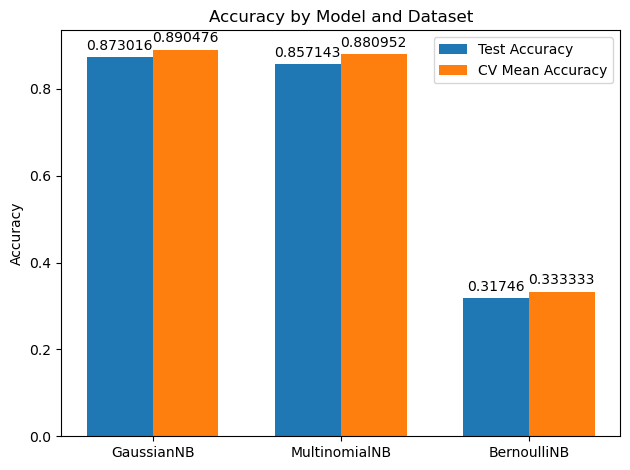

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Seeds dataset
data_path = "E:\Homework\ml\Task 2 - classification\seeds\seeds_dataset.txt"
column_names = ['area', 'perimeter', 'compactness', 'length_of_kernel', 'width_of_kernel', 'asymmetry_coefficient', 'length_of_kernel_groove', 'type']
data = pd.read_csv(data_path, sep='\t+', header=None, names=column_names, engine='python')

# Split the dataset into features and target variable
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Data normalization for MultinomialNB
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models
models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB()
}

# Initialize dictionaries for accuracies and CV scores
test_accuracies = {}
cv_means = {}

# Train and evaluate each model
for name, model in models.items():
    # Adjust data preparation for MultinomialNB
    if name == "MultinomialNB":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        X_scaled = scaler.transform(X)  # For CV
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        X_scaled = X  # For CV

    # Evaluate model performance
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0) # Handle zero division
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0) # Handle zero division

    test_accuracies[name] = accuracy
    cv_scores = cross_val_score(model, X_scaled, y, cv=10)
    cv_means[name] = cv_scores.mean()

    # Print detailed performance metrics
    print(f"{name} Performance Metrics:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0)) # Handle zero division
    print(f"{name} CV Mean Accuracy: {cv_scores.mean():.4f}\n")

# Visualization of accuracies and CV scores
labels = list(test_accuracies.keys())
test_scores = list(test_accuracies.values())
cv_scores = list(cv_means.values())

x = range(len(labels))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, test_scores, width, label='Test Accuracy')
rects2 = ax.bar([p + width for p in x], cv_scores, width, label='CV Mean Accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Model and Dataset')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

